# Logistic Regression on 2010 Brazilian Census Data

## What is Logistic Regression?

Logistic regression is a statistical model used mainly in binary classification, although it can be used for multiclass classification.

It's a predictive model that results in a binary dependent variable that can assume only two possible values. Logistic regression differs from linear regression by using logistic function rather than a linear function to rank the results.  There are several advantage of using this function: it brings more robustness to the results, since the independent variables don’t have to be normally distributed, or have equal variance in each group, and also bring clarity on classification, since logistic function is much more sensitive in data close to the border value and much less sensitive in values far from the border, causing it to generate binary results with greater reliability.

Logistic function can be written as $$g(z) = \frac{1}{1+e^{-z}}$$ and its graph can be shown below:



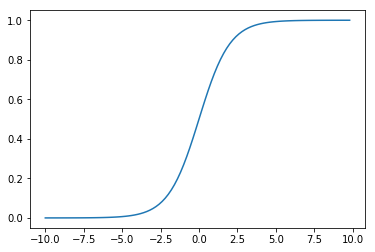

In [2]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

x = np.arange(-10., 10., 0.2)
sig = sigmoid(x)
plt.plot(x,sig)
plt.show()

Since linear regression has the formula $$h_\theta(X) = \theta^TX$$ where $\theta^TX = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... + \theta_n x_n$, we just need to generalize it in order to be used as logistic regression:

$$h_\theta(X) = g(\theta^TX)$$

Yielding:

$$h_\theta(X) = \frac{1}{1 + e^{-\theta^TX}}$$

So, how can this model be used on machine learning? It can be used to make predictions using a set of samples that will train a logistic regression classifier. When this classifier is trained, it's use is very straightforward. So, let's see an use case from 2010 brazilian census.

## Hands on!

In this case, we will train a classifier in order to predict if the income over or under the median based on following characteristics: quantity of rooms, quantity of bathrooms, presence of sewer, presence of tap water, kind of garbage collection, kind of electric network, presence of washing machine, presence of refrigerator, kind of habitation and adequation of habitation. These will be used to predict the family net income.

First we load data from IBGE (Brazilian Institute of Geography and Statistics) site and remove undesired fields. The data set is in fixed width format and it's dictionary can be downloaded at ftp://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados/Documentacao.zip . For this case, we will only use data from São Paulo state:

In [3]:
import pandas as pd
import ftplib
import zipfile
from IPython.display import display
import ipywidgets as widgets

out = widgets.HTML(value='',
    placeholder='',
    description='')
display(out)

col_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a8', 'a9', 'a10', 
             'a11', 'a12', 'a13', 'a14', 'a15', 'a16', 'qtyrooms', 'a18', 'a19', 'a20', 
             'qtybath', 'a22', 'sewer', 'waterpipes', 'a25', 'trash', 'electricity', 'a28', 'a29', 'a30', 
             'washmachine', 'refrigerator', 'a33', 'a34', 'a35', 'a36', 'a37', 'car', 'a39', 'a40', 
             'a41', 'a42', 'familynetincome', 'a44', 'a45', 'a46', 'kindhabitation', 'a48', 'adequation', 'a50', 
             'a51', 'a52', 'a53', 'a54', 'a55', 'a56', 'a57', 'a58', 'a59', 'a60', 
             'a61', 'a62', 'a63', 'a64', 'a65', 'a66', 'a67', 'a68', 'a69', 'a70', 
             'a71', 'a72', 'a73', 'a74', 'a75', 'a76', 'a77', 'a78']

col_widths = [2, 5, 13, 8, 16, 1, 2, 3, 2, 1, 2, 2, 1, 6, 9, 1, 
              2, 3, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
              1, 1, 1, 1, 1, 1, 2, 1, 1, 7, 10, 8, 9, 1, 1, 1, 1, 
              1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
              1, 1, 1, 1, 1, 1, 1, 1]


#downloading file
out.value = "Downloading file..."
ftp = ftplib.FTP("ftp.ibge.gov.br")
ftp.login("", "") 
ftp.cwd("/Censos/Censo_Demografico_2010/Resultados_Gerais_da_Amostra/Microdados")
ftp.retrbinary("RETR SP1.zip", open("/tmp/SP1.zip", 'wb').write)

out.value = "Extracting file..."
zip_ref = zipfile.ZipFile("/tmp/SP1.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

out.value = "Done."

HTML(value='', placeholder='')

In [4]:
# read into dataframe
tmp = pd.read_fwf('/tmp/SP1/Amostra_Domicilios_35_outras.txt', widths=col_widths, names=col_names)
df = tmp[['qtyrooms', 'qtybath', 'sewer', 'waterpipes', 'trash', 'electricity', 
          'washmachine', 'refrigerator', 'familynetincome', 'kindhabitation', 'adequation']].copy()

del tmp

In [5]:
df.dropna(inplace=True)
df['qtyrooms'] = df['qtyrooms'].astype(int)
df['qtybath'] = df['qtybath'].astype(int)
df['sewer'] = df['sewer'].astype(int)
df['waterpipes'] = df['waterpipes'].astype(int)
df['trash'] = df['trash'].astype(int)
df['electricity'] = df['electricity'].astype(int)
df['washmachine'] = df['washmachine'].astype(int)
df['refrigerator'] = df['refrigerator'].astype(int)
df['familynetincome'] = df['familynetincome'].astype(int)
df['kindhabitation'] = df['kindhabitation'].astype(int)
df['adequation'] = df['adequation'].astype(int)

So now we can have a glance of the data:

In [6]:
df.head()

,qtyrooms,qtybath,sewer,waterpipes,trash,electricity,washmachine,refrigerator,familynetincome,kindhabitation,adequation
0,5,1,1,1,1,1,2,1,510,1,2
1,5,1,1,1,1,1,1,1,1900,2,2
2,5,1,1,1,1,1,2,1,1020,2,2
3,4,1,1,1,1,1,2,1,68,3,2
4,10,3,1,1,1,1,1,1,3758,2,2


Let's see what is the value of the median of family net income. For the sake of this study, we will set all values equal or above median to 1 and below median to 0:

In [7]:
median = df.familynetincome.median()
median

1703.0

In [8]:
df.loc[df['familynetincome'] < median, 'familynetincome'] = 0
df.loc[df['familynetincome'] >= median, 'familynetincome'] = 1

Now, let's separate all independent variables from the dependent, and let's train the classifier:

In [9]:
import numpy as np
from sklearn import linear_model

In [10]:
X = df[['qtyrooms', 'qtybath', 'sewer', 'waterpipes', 'trash', 'electricity', 
          'washmachine', 'refrigerator', 'kindhabitation', 'adequation']]
y = df['familynetincome']

In [11]:
clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
fitted_model = clf.fit(X, y)

Pretty straightforward, huh?

So now we can use this trained classifier to predict if the income is above or below median:

In [12]:
prediction_result = clf.predict([(10, 3, 1, 1, 1, 1, 1, 1, 2, 2)])
prediction_result

array([1])

In [13]:
prediction_result = clf.predict([(4, 1, 1, 1, 1, 1, 2, 1, 3, 2)])
prediction_result

array([0])


Do you remember that, for logistic regression, we need to get $\theta$ in order to compute it on $h_\theta(X) = g(\theta^TX)$, right? So, if you want to read values for $\theta$, you just need to do the following:

In [14]:
# For theta_0:

print(fitted_model.intercept_)

[-4.40468002]


In [26]:
# For theta_1 to theta_10, in this case:

print(fitted_model.coef_)

[[ 0.2286218   0.43581317 -0.22098449 -0.11330352 -0.05717134 -0.20821814
  -1.09090793 -0.85579353  0.69167597  2.05417498]]


So, if you want to directly compute it from above $\theta$ values, we just need to first compute the dot product between $\theta$ and $X$ arrays and then feed the result to $g(z)$ function. Let's do it for values shown above:

In [31]:
res = fitted_model.intercept_ + np.dot(fitted_model.coef_,[4, 1, 1, 1, 1, 1, 2, 1, 3, 2])
res

array([-0.50828866])

In [32]:
1 / (1 + math.exp(-res))

0.37559478970025234

Since the result is below $0.5$, the result goes to $0$.

Let's make same calculations for another $X$ array above:

In [33]:
res = fitted_model.intercept_ + np.dot(fitted_model.coef_,[10, 3, 1, 1, 1, 1, 1, 1, 2, 2])
res

array([2.13430044])

In [34]:
1 / (1 + math.exp(-res))

0.8941925729153888

Since the value is above $0.5$, result goes to $1$.

## Conclusion:

Logistic Regression is a very fast and robust way to estimate in which group a individual pertains, just looking for some features. Sklearn provides a way to do it quickly over a big set of individuals.

Beyound this simple application on census data, logistic regression can be used to predict churns, failures on networks, telemarketing conversion rates, and so on. Possibilities are simply infinite.